In [ ]:
import numpy as np
import pandas as pd

# Define the number of samples
num_samples = 1000

# Generate synthetic data for features (temperature, precipitation, wind speed)
temperature = np.random.randint(10, 35, num_samples)  # Temperature in Celsius
precipitation = np.random.rand(num_samples) * 10  # Precipitation in mm
wind_speed = np.random.randint(5, 25, num_samples)  # Wind speed in km/h

# Generate synthetic data for the target variable (delayed or not delayed)
delay_prob = np.random.rand(num_samples)  # Probability of delay
delayed = (delay_prob > 0.5).astype(int)  # 1 if delayed, 0 if not delayed

# Create a DataFrame to store the synthetic dataset
flight_data = pd.DataFrame({
    'Temperature (°C)': temperature,
    'Precipitation (mm)': precipitation,
    'Wind Speed (km/h)': wind_speed,
    'Delayed': delayed
})

# Save the dataset to a CSV file
flight_data.to_csv('flight_data.csv', index=False)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load data from CSV file
df = pd.read_csv('flight_data.csv')

# Extract features and target variable
X = df[['temperature', 'precipitation', 'wind_speed']].values
y = df['delay'].values

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the kNN model
k = 3  # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train_scaled, y_train)

# Predicting flight delays
y_pred = knn_classifier.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.545


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load data from CSV file
df = pd.read_csv('flight_data.csv')

# Extract features and target variable
X = df[['temperature', 'precipitation', 'wind_speed']].values
y = df['delay'].values

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the SVM model
svm_classifier = SVC(kernel='linear')  # Linear kernel
svm_classifier.fit(X_train_scaled, y_train)

# Predicting flight delays
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.47


Epoch 1/50
25/25 [==============================] - 6s 81ms/step - loss: 0.6935 - accuracy: 0.4900 - val_loss: 0.6936 - val_accuracy: 0.4800
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5150 - val_loss: 0.6943 - val_accuracy: 0.4800
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5150 - val_loss: 0.6948 - val_accuracy: 0.4800
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5150 - val_loss: 0.6950 - val_accuracy: 0.4800
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5150 - val_loss: 0.6953 - val_accuracy: 0.4800
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5150 - val_loss: 0.6963 - val_accuracy: 0.4800
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.5150 - val_loss: 0.6962 - val_accuracy: 0.4800
Epoch 8/50
25/25 [=

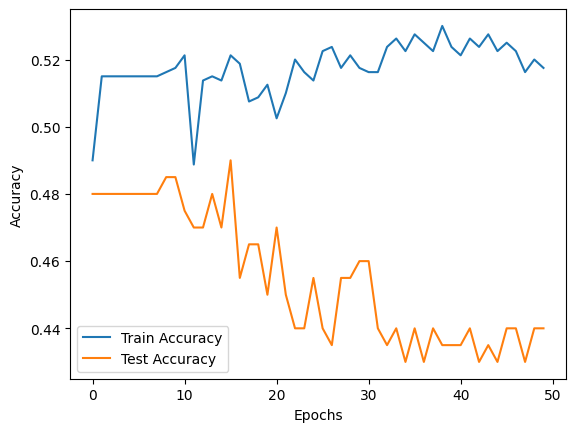

7/7 [==============================] - 0s 2ms/step


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load data from CSV file
df = pd.read_csv('flight_data.csv')

# Extract features and target variable
X = df[['temperature', 'precipitation', 'wind_speed']].values
y = df['delay'].values

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
split_ratio = 0.8
split_index = int(len(X_scaled) * split_ratio)
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape input data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define LSTM model architecture
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
_, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
_, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy: %.2f%%, Test Accuracy: %.2f%%' % (train_accuracy * 100, test_accuracy * 100))

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict(X_test)
